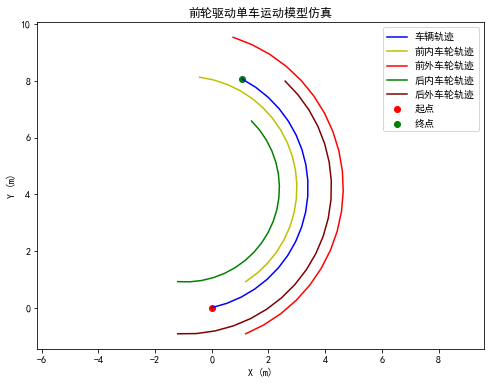

    时间/s    车辆中心_x    车辆中心_y   前内轮中心_x   前内轮中心_y   前外轮中心_x   前外轮中心_y  \
0    0.0  0.000000  0.000000  1.200000  0.920000  1.200000 -0.920000   
1    0.1  0.534188  0.154207  1.606393  1.220403  1.842193 -0.604425   
2    0.2  1.044208  0.375599  1.970938  1.570410  2.438649 -0.209153   
3    0.3  1.521652  0.660526  2.287622  1.964248  2.979532  0.259296   
4    0.4  1.958645  1.004290  2.551225  2.395422  3.455923  0.793198   
5    0.5  2.347981  1.401220  2.757398  2.856822  3.859964  1.383748   
6    0.6  2.683239  1.844772  2.902741  3.340839  4.184994  2.021208   
7    0.7  2.958890  2.327630  2.984859  3.839492  4.425652  2.695065   
8    0.8  3.170389  2.841833  3.002395  4.344556  4.577970  3.394206   
9    0.9  3.314249  3.378899  2.955062  4.847703  4.639435  4.107103   
10   1.0  3.388095  3.929973  2.843640  5.340636  4.609034  4.821998   
11   1.1  3.390712  4.485967  2.669967  5.815225  4.487269  5.527103   
12   1.2  3.322055  5.037712  2.436906  6.263644  4.276146  6.21

PermissionError: [Errno 13] Permission denied: 'result2.xlsx'

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 车辆参数
L_f = 1.2
L_r = 1.2
V = 5.56  # 车辆速度，单位：米/秒
delta = np.deg2rad(30)  # 前轮偏转角，单位：弧度
car_length = 4.0  # 车身长度 m
car_width = 2.0   # 车身宽度 m
wheel_diameter = 0.6  # 车轮直径 m
wheel_width = 0.16  # 车轮宽度 m
front_offset = 0.5  # 前轮到车头距离 m
rear_offset = 0.5  # 后轮到车尾距离 m
# 轮子相对于车辆中心的横向和纵向偏移量
front_wheel_offset = car_length / 2 - front_offset - wheel_diameter / 2
rear_wheel_offset = -car_length / 2 + rear_offset / 2 + wheel_diameter / 2
side_wheel_offset = car_width / 2 - wheel_width / 2


len_center = math.sqrt(front_wheel_offset * front_wheel_offset + side_wheel_offset * side_wheel_offset)


theta_rad = np.arctan(side_wheel_offset / front_wheel_offset)


# 运动参数
dt = 0.1  # 时间间隔，单位：秒
total_time = 2  # 总仿真时间，单位：秒
steps = int(total_time / dt)  # 总步数

# 初始化车辆状态
x = 0  # 车辆x坐标，单位：米
y = 0  # 车辆y坐标，单位：米
psi = 0  # 车辆航向角，单位：弧度
beta = np.arctan((L_r / (L_r + L_f)) * np.tan(delta))

# 车辆运动轨迹
x_traj = []
y_traj = []
x_front_in_traj = []
y_front_in_traj = []
x_front_out_traj = []
y_front_out_traj = []
x_rear_in_traj = []
y_rear_in_traj = []
x_rear_out_traj = []
y_rear_out_traj = []

# 初始化位置数据列表，包含车辆中心及四个轮子的位置
data = []

for step in range(steps):
    # 车辆中心位置
    x_center = x
    y_center = y
    
    
    # 各轮子位置计算
    x_front_in = x_center + np.cos(theta_rad + psi) * len_center
    y_front_in = y_center + np.sin(theta_rad + psi) * len_center
    
    x_front_out = x_center + np.cos(theta_rad - psi) * len_center
    y_front_out = y_center - np.sin(theta_rad - psi) * len_center
    
    x_rear_in = x_center - np.cos(theta_rad - psi) * len_center
    y_rear_in = y_center + np.sin(theta_rad - psi) * len_center
    
    x_rear_out = x_center - np.cos(theta_rad + psi) * len_center
    y_rear_out = y_center - np.sin(theta_rad + psi) * len_center
    
    # 收集当前时间步的数据
    data.append([step * dt,
                 x_center, y_center,
                 x_front_in, y_front_in,
                 x_front_out, y_front_out,
                 x_rear_in, y_rear_in,
                 x_rear_out, y_rear_out])
    
    
    x_traj.append(x)
    y_traj.append(y)
        
    x_front_in_traj.append(x_front_in)
    y_front_in_traj.append(y_front_in)
    x_front_out_traj.append(x_front_out)
    y_front_out_traj.append(y_front_out)
    x_rear_in_traj.append(x_rear_in)
    y_rear_in_traj.append(y_rear_in)
    x_rear_out_traj.append(x_rear_out)
    y_rear_out_traj.append(y_rear_out)
    
    
    # 更新x、y坐标以及与x轴夹角
    x += V * np.cos(psi + beta) * dt
    y += V * np.sin(psi + beta) * dt
    psi += (V / L_r) * np.sin(beta) * dt
    

# 绘制车辆轨迹
plt.figure(figsize=(8, 6))
plt.plot(x_traj, y_traj, label='车辆轨迹', color='b')
plt.plot(x_front_in_traj, y_front_in_traj, label='前内车轮轨迹',color='y')
plt.plot(x_front_out_traj, y_front_out_traj, label='前外车轮轨迹',color='r')
plt.plot(x_rear_in_traj, y_rear_in_traj, label='后内车轮轨迹',color='g')
plt.plot(x_rear_out_traj, y_rear_out_traj, label='后外车轮轨迹',color='maroon')
plt.scatter(x_traj[0], y_traj[0], color='r', marker='o', label='起点')
plt.scatter(x_traj[-1], y_traj[-1], color='g', marker='o', label='终点')
plt.axis('equal')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('前轮驱动单车运动模型仿真')
plt.legend()
plt.show()



# 构建DataFrame
columns = ['时间/s',
           '车辆中心_x', '车辆中心_y', 
           '前内轮中心_x', '前内轮中心_y', 
           '前外轮中心_x', '前外轮中心_y',
           '后内轮中心_x', '后内轮中心_y', 
           '后外轮中心_x', '后外轮中心_y']
df_positions = pd.DataFrame(data, columns=columns)

# 打印DataFrame
print(df_positions)

# 保存到Excel文件
df_positions.to_excel('result2.xlsx', index=False)


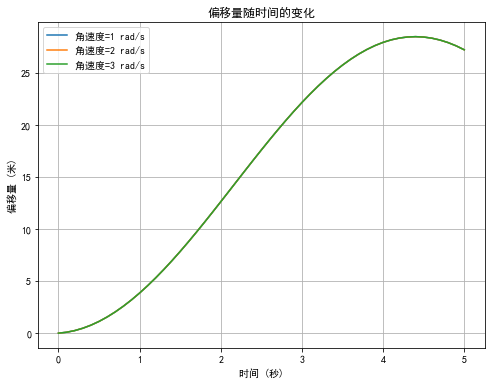

In [34]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为中文可显示的字体，比如黑体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 定义车辆参数
L = 2.5  # 车辆轴距，单位：米
V = 10  # 车辆速度，单位：米/秒
delta = np.deg2rad(10)  # 前轮转向角度，单位：弧度

# 定义仿真参数
dt = 0.1  # 时间间隔，单位：秒
total_time = 5  # 总仿真时间，单位：秒
steps = int(total_time / dt)  # 总步数

# 初始化车辆状态
x = 0  # 车辆x坐标，单位：米
y = 0  # 车辆y坐标，单位：米
theta = 0  # 车辆航向角，单位：弧度

# 仿真车辆运动
x_traj = [x]
y_traj = [y]

for _ in range(steps):
    x += V * np.cos(theta) * dt
    y += V * np.sin(theta) * dt
    print(theta)
    theta += (V / L) * np.tan(delta) * dt

    x_traj.append(x)
    y_traj.append(y)

# 绘制车辆轨迹
plt.figure(figsize=(8, 6))
plt.plot(x_traj, y_traj, label='车辆轨迹')
plt.scatter(x_traj[0], y_traj[0], color='r', marker='o', label='起点')
plt.scatter(x_traj[-1], y_traj[-1], color='g', marker='o', label='终点')
plt.axis('equal')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('前轮驱动单车运动模型仿真')
plt.legend()
plt.show()

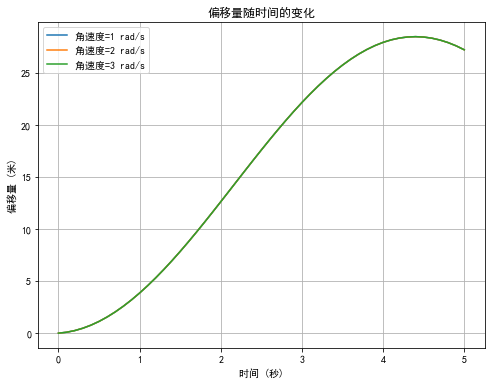

In [36]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 车辆参数
L_f = 1.25
L_r = 1.25
V = 10  # 车辆速度，单位：米/秒
delta = np.deg2rad(10)  # 前轮偏转角，单位：弧度
omega_values = [1, 2, 3]  # 角速度，单位：弧度/秒

# 运动参数
dt = 0.1  # 时间间隔，单位：秒
total_time = 5  # 总仿真时间，单位：秒
steps = int(total_time / dt)  # 总步数

# 绘制偏移量随时间的变化曲线
plt.figure(figsize=(8, 6))

for omega in omega_values:
    # 初始化车辆状态
    x = 0  # 车辆x坐标，单位：米
    y = 0  # 车辆y坐标，单位：米
    psi = 0  # 车辆航向角，单位：弧度
    beta = np.arctan((L_r / (L_r + L_f)) * np.tan(delta))

    # 车辆运动轨迹
    x_traj = [x]
    y_traj = [y]

    for _ in range(steps):
        # 更新x、y坐标以及与x轴夹角
        x += V * np.cos(psi + beta) * dt
        y += V * np.sin(psi + beta) * dt
        psi += (V / L_r) * np.sin(beta) * dt

        x_traj.append(x)
        y_traj.append(y)

    t = np.linspace(0, total_time, steps + 1)
    plt.plot(t, y_traj, label=f'角速度={omega} rad/s')

plt.xlabel('时间 (秒)')
plt.ylabel('偏移量 (米)')
plt.title('偏移量随时间的变化')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
import math

# 车辆尺寸
length = 4  # m
width = 2   # m
wheel_diameter = 0.6  # m
wheel_width = 0.16    # m
front_to_wheel = 0.5  # m
rear_to_wheel = 0.5   # m

# 停车位尺寸
parking_space_length = 5.3  # m
parking_space_width = 2.4   # m
road_width = 5.5            # m

# 计算车辆A的转弯半径R
R = (length + front_to_wheel + rear_to_wheel) / 2

# 计算车辆A的最大和最小转弯角度
max_angle = math.atan((R + wheel_diameter / 2) / width)
min_angle = math.atan((R - wheel_diameter / 2 - wheel_width) / width)

# 计算车辆A开始转弯的位置
start_position = R + wheel_diameter / 2 + wheel_width / 2

print("最大转弯角度：", max_angle * 180 / math.pi, "度")
print("最小转弯角度：", min_angle * 180 / math.pi, "度")
print("车辆开始转弯的位置：", start_position, "m")

前内轮最大转弯角度（角度）： 90.0
前内轮最小转弯角度（角度）： -10.684912400002718
车辆开始转弯的位置（m）： 3.3


In [90]:
import math
import numpy as np

# 计算内后轮

r_in = 0.2

L = 2.4

R = r_in + 0.92

psi = np.rad2deg(math.atan(L / R))

if psi >= 40:
    psi = 40
    
print('最大转弯角度为：', psi)
# 计算外前轮

r_out = 5.5 + 5.3 - 0.65 - 0.5 - 0.6 / 2

R = math.sqrt(r_out * r_out - L * L) - 0.92

psi = np.rad2deg(math.atan(L / R))

print('最小转弯角度为：', psi)


最大转弯角度为： 40
最小转弯角度为： 16.472187320919375


In [143]:
import random
import math
import numpy as np

# 车辆参数
vehicle_length = 4.0  # 车辆长度（m）
vehicle_width = 2.0  # 车辆宽度（m）
wheel_diameter = 0.6  # 车轮直径（m）
wheel_width = 0.16  # 车轮宽度（m）
front_rear_distance = 0.5  # 前后轮到车头车尾的距离（m）
L = 2.4

# 车位参数
parking_space_length = 5.3  # 停车位长度（m）
parking_space_width = 2.4  # 停车位宽度（m）
road_width = 5.5  # 道路宽度（m）

# 蒙特卡罗模拟参数
num_samples = 1000000  # 采样次数

# 初始化最大和最小转弯角度
max_turn_angle = 0
min_turn_angle = 50

# 初始化最大和最小转弯开始位置
max_start_turn_position = parking_space_length
min_start_turn_position = 0.0

# 蒙特卡罗模拟
for _ in range(num_samples):
    # 随机生成一个车辆开始转弯的位置
    start_position = random.uniform(0, parking_space_length)

    # 随机车辆在转弯过程中的最大和最小转弯角度
    max_angle = random.uniform(0, 40)
    min_angle = random.uniform(0, 40)

    # 更新最大和最小转弯角度  
    if max_angle > max_turn_angle:
        R = L / math.tan(np.deg2rad(max_angle))
        R_in = R - 0.92
        if R_in * R_in - (R_in - 0.2) * (R_in - 0.2) >= (3.85 - start_position) * (3.85 - start_position):
            max_turn_angle = max(max_turn_angle, max_angle)
    
    if min_angle < min_turn_angle:
        R = L / math.tan(np.deg2rad(min_angle))
        R_out = math.sqrt((R + 0.92) * (R + 0.92) + 2.4 * 2.4)
        if start_position + R_out <= 5.5 + 3.85:
            min_turn_angle = min(min_turn_angle, min_angle)

# 使用蒙特卡罗统计开始转弯位置
for _ in range(num_samples):
    # 随机生成一个车辆开始转弯的位置
    start_position = random.uniform(0, parking_space_length)
    # 更新最大转弯开始位置
    R = L / math.tan(np.deg2rad(max_turn_angle))
    R_in = R - 0.92
    if R_in * R_in - (R_in - 0.2) * (R_in - 0.2) >= (3.85 - start_position) * (3.85 - start_position):
        max_start_turn_position = min(max_start_turn_position, start_position)
        
# 再次使用蒙特卡罗统计开始转弯位置
for _ in range(num_samples):
    # 随机生成一个车辆开始转弯的位置
    start_position = random.uniform(0, parking_space_length)
    # 更新最大转弯开始位置
    R = L / math.tan(np.deg2rad(min_turn_angle))
    R_out = math.sqrt((R + 0.92) * (R + 0.92) + 2.4 * 2.4)
    if start_position + R_out <= 5.5 + 3.85:
        min_start_turn_position = max(min_start_turn_position, start_position)

# 打印结果
print("前内轮最大转弯角度（角度）：", max_turn_angle)
print("前内轮最小转弯角度（角度）：", min_turn_angle)
print("最大转弯开始位置距离出库线（m）：", 3.85 - max_start_turn_position)
print("最小转弯开始位置距离起点（m）：", min_start_turn_position)

前内轮最大转弯角度（角度）： 39.99986100063008
前内轮最小转弯角度（角度）： 16.488771120076585
最大转弯开始位置距离出库线（m）： 0.8579514025121195
最小转弯开始位置距离起点（m）： 0.008339715574372108
